# Data Augmentation

In [3]:
from volumentations import *
from tifffile import imread, imwrite
import numpy as np
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

In [67]:
# Depois tentar alterar também o contraste das imagens
def get_augmentation(patch_size):
    return Compose([
        Rotate((-30, 30), (0, 0), (0, 0), p=0.4),
        #ElasticTransform((0, 0.25), interpolation=2, p=0.3),
        #Resize(patch_size, interpolation=1, resize_type=0, always_apply=True, p=1.0),
        Flip(0, p=0.5),
        Flip(1, p=0.5),
        Flip(2, p=0.5),
], p=1.0)
    
def augmentation(filename, dataset, n_samples):
    
    list_IDs = os.listdir(filename + dataset)
    IDs = []
    
    """
    n = 0
    while n < n_samples:
    ID = list_IDs[randint(0, len(list_IDs))]
    lbl = imread(filename + '/Masks/' + ID)
    is_all_zeros = np.all((lbl == 0))

    if is_all_zeros:
      IDs.append(ID)
      print(ID)
      n = n + 1
    """
    # choose random instances
    indexes = randint(0, len(list_IDs), n_samples)
    IDs = [list_IDs[k] for k in indexes]

    for i in range(n_samples):
        img = imread(filename + '/Images/' + IDs[i])*255.
        lbl = imread(filename + '/Masks/' + IDs[i])
        img = img.astype(np.uint8)
        lbl = lbl.astype(np.uint8)
        aug = get_augmentation((64,64,64)) 
        # with mask
        data = {'image': img, 'mask': lbl}
        aug_data = aug(**data)
        img, lbl = aug_data['image'], aug_data['mask']
        img = img/255.
        img = img.astype(np.float32)
        lbl = lbl.astype(np.float32)
        imwrite(filename + '/Images' + '/img_patch_' + str(5) + str(i) + '.tif', img)
        imwrite(filename + '/Masks' + '/img_patch_' + str(5) + str(i) + '.tif', lbl)


In [68]:
import os
augmentation('./Dataset/Patches_Pre_64/Train', '/Images', 150)

[0.         0.02352941 0.05098039 0.07843138 0.10196079 0.12941177
 0.15686275 0.18039216 0.2        0.20784314 0.23529412 0.2627451
 0.28627452 0.3137255  0.34117648 0.3647059  0.39215687 0.4
 0.41960785 0.44705883 0.47058824 0.49803922 0.5254902  0.54901963
 0.5764706  0.6        0.6039216  0.6313726  0.654902   0.68235296
 0.70980394 0.73333335 0.7607843  0.7882353  0.8        0.8156863
 0.8392157  0.8666667  0.89411765 0.91764706 0.94509804 0.972549
 1.        ]
float32
[0. 1.]
float32


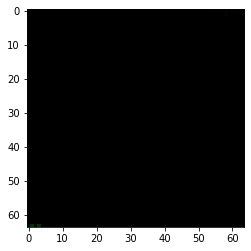

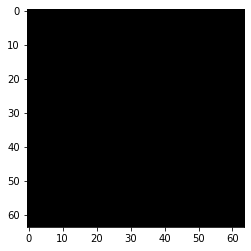

In [86]:
img = imread('./Dataset/Patches_Pre_64/Train/Images/img_patch_5132.tif')
print(np.unique(img))
print(img.dtype)
plt.figure(1)
imshow(img[:,:,25,:])
plt.figure(2)
b = imread('./Dataset/Patches_Pre_64/Train/Masks/img_patch_5132.tif')
print(np.unique(b))
print(b.dtype)
a = np.zeros((64,64,64,3))
a[:,:,:,:2] = b
imshow(a[:,:,25,:])
#a = a*255.
#img = img*255.

#img = img.astype('uint8')
#a = a.astype('uint8')

#imwrite('./Dataset/' + 'augmented_image.tif' , img, photometric='rgb')
#imwrite('./Dataset/' + 'augmented_mask.tif' , a, photometric='rgb')

In [16]:
org_img =  imread('./Dataset/Patches_128/Train/Images/img_patch_10.tif')*255.
org_mask = imread('./Dataset/Patches_128/Train/Masks/img_patch_10.tif')*255.

org_a = np.empty((128,128,64,3))
org_a[:,:,:,:2] = org_mask

org_img = org_img.astype('uint8')
org_a = org_a.astype('uint8')

imwrite('./Dataset/' + 'original_image.tif' , org_img, photometric='rgb')
imwrite('./Dataset/' + 'original_mask.tif' , org_a, photometric='rgb')

# Pre-Processing

Contrast adjustment

Tentar aplicar:
    - Percentile Equalization 
    - Histogram Equalization

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import data, img_as_float
from skimage import exposure

In [7]:
# Percentile Equalization 
def percentile_equalization(path):
    img_list = os.listdir(path)

    perc_values =  np.array([[95, 99.8], [95, 98]])
    
    pre_path = './Dataset_3/Images_Pre/'
    if os.path.exists(pre_path)==False:
        os.mkdir(pre_path)

    for j in range(len(img_list)):
        img = imread(path + img_list[j])
        pre_img = np.zeros(img.shape)
        for i in range(img.shape[3]-1):
            img_channel = img[:,:,:,i]	
            minval = np.percentile(img_channel, perc_values[i,0]) 	
            maxval = np.percentile(img_channel, perc_values[i,1])	
            img_channel = np.clip(img_channel, minval, maxval)
            if maxval == minval:
                minval -= 10
            pre_img[:,:,:,i] = (((img_channel - minval) / (maxval - minval)) * 255)
        
        pre_img = pre_img.astype('uint8')
        imwrite(pre_path + img_list[j] , pre_img, photometric='rgb')
            

In [8]:
percentile_equalization('./Dataset_3/Images/')

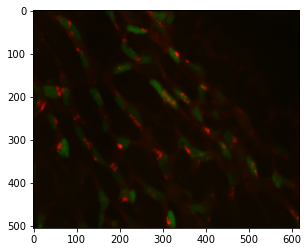

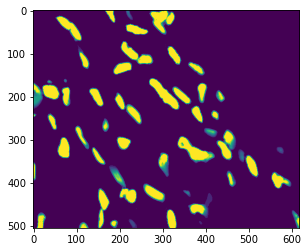

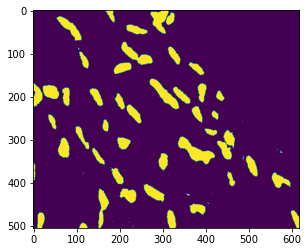

In [28]:
img = imread('./Dataset/Images/Crop1.tif')

perc_values =  np.array([[95, 99.8], [95, 98]])

pre_img = np.zeros(img.shape)

for i in range(img.shape[3]-1):
            img_channel = img[:,:,:,i]
            minval = np.percentile(img_channel, perc_values[i,0])
            maxval = np.percentile(img_channel, perc_values[i,1])
            img_channel = np.clip(img_channel, minval, maxval)
            pre_img[:,:,:,i] = (((img_channel - minval) / (maxval - minval)) * 255)
            #pre_img = pre_img.astype('uint8')

plt.figure(1)
imshow(img[:,:,20,:]/255.)
plt.figure(2)
imshow(pre_img[:,:,20,1]/255.)

mask = imread('./Dataset/Masks/Crop1.tif')
plt.figure(3)
imshow(mask[:,:,20,1]/255.)




# Histogram

float64


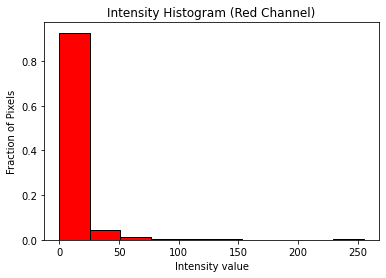

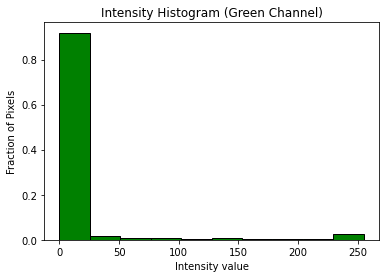

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# tuple to select colors of each channel line
colors = ["red", "green"]
title = ["Intensity Histogram (Red Channel)","Intensity Histogram (Green Channel)"]
channel_ids = (0, 1)
figure = [1,2]

# create the histogram plot, with three lines, one for
# each color
for channel_id, c, i, tit in zip(channel_ids, colors, figure, title):
  #fig = plt.figure()
  #ax = fig.add_subplot(111)
  plt.figure(i)
  img_channel = (pre_img[:, :, :, channel_id]).flatten()
  plt.hist(img_channel, color = c, edgecolor='black', weights=np.ones_like(img_channel) / len(img_channel))
  plt.title(tit)
  plt.xlabel("Intensity value")
  plt.ylabel("Fraction of Pixels")
  #plt.savefig("/content/drive/MyDrive/Alice_Mestrado/"+c+"_pre.png")

print(pre_img.dtype)
